<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Setup-and-Data-Imports" data-toc-modified-id="Setup-and-Data-Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Setup and Data Imports</a></span><ul class="toc-item"><li><span><a href="#Environment-Setup" data-toc-modified-id="Environment-Setup-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Environment Setup</a></span></li><li><span><a href="#ETF-Returns" data-toc-modified-id="ETF-Returns-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>ETF Returns</a></span></li><li><span><a href="#Risk-Free-Rate" data-toc-modified-id="Risk-Free-Rate-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Risk-Free Rate</a></span></li><li><span><a href="#Helper-Functions" data-toc-modified-id="Helper-Functions-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Helper Functions</a></span></li></ul></li><li><span><a href="#The-Efficient-Frontier-in-Python" data-toc-modified-id="The-Efficient-Frontier-in-Python-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>The Efficient Frontier in Python</a></span><ul class="toc-item"><li><span><a href="#Plotting-the-Frontier" data-toc-modified-id="Plotting-the-Frontier-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Plotting the Frontier</a></span></li><li><span><a href="#Constructing-Efficient-Portfolios" data-toc-modified-id="Constructing-Efficient-Portfolios-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Constructing Efficient Portfolios</a></span></li><li><span><a href="#Efficient-Portfolio-Performance-in-2019" data-toc-modified-id="Efficient-Portfolio-Performance-in-2019-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Efficient Portfolio Performance in 2019</a></span></li></ul></li><li><span><a href="#Backtesting-the-Efficient-Frontier" data-toc-modified-id="Backtesting-the-Efficient-Frontier-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Backtesting the Efficient Frontier</a></span><ul class="toc-item"><li><span><a href="#Generate-60/40-Portfolio-Data" data-toc-modified-id="Generate-60/40-Portfolio-Data-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Generate 60/40 Portfolio Data</a></span></li><li><span><a href="#Generate-Efficient-Portfolio-History" data-toc-modified-id="Generate-Efficient-Portfolio-History-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Generate Efficient Portfolio History</a></span></li><li><span><a href="#Efficient-Portfolio-Weights-Over-Time" data-toc-modified-id="Efficient-Portfolio-Weights-Over-Time-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Efficient Portfolio Weights Over Time</a></span></li><li><span><a href="#Evaluating-Performance" data-toc-modified-id="Evaluating-Performance-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Evaluating Performance</a></span></li></ul></li><li><span><a href="#Discussion-and-Next-Steps" data-toc-modified-id="Discussion-and-Next-Steps-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Discussion and Next Steps</a></span></li><li><span><a href="#Appendix---Additional-Simulations" data-toc-modified-id="Appendix---Additional-Simulations-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Appendix - Additional Simulations</a></span><ul class="toc-item"><li><span><a href="#Helper-Functions" data-toc-modified-id="Helper-Functions-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Helper Functions</a></span></li><li><span><a href="#Without-GLD" data-toc-modified-id="Without-GLD-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Without GLD</a></span></li><li><span><a href="#Only-SPY,-AGG,-and-VNQ" data-toc-modified-id="Only-SPY,-AGG,-and-VNQ-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Only SPY, AGG, and VNQ</a></span></li><li><span><a href="#SPY-and-AGG" data-toc-modified-id="SPY-and-AGG-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>SPY and AGG</a></span></li></ul></li></ul></div>

# Introduction

Nobel laureate Harry Markowitz's work provides a compelling representation of the trade-off between risk and return. His most well-known visual illustration of this trade-off is the "efficient frontier" (EF). Given a set of investment selections with varying weights in a portfolio, the EF represents the most efficient allocations for each possible return. The highest efficiency, in this case, is measured by the lowest volatility for a given return level. For decades, investors have benefitted from Markowitz's insights into asset allocation.

Investors not as inclined to elegant theoretical models have also benefitted from allocation heuristics for portfolio construction. One of the most enduring allocation models for US investors is portfolio comprised of equities and bonds in a 60%/40% allocation, respectively. 

How well does the theoretical map onto practical decision making? This project explores using the EF for real portfolio allocations. Return data for exchange-traded funds (ETFs) is used in modeling the EF and choosing weights for a portfolio of those ETFs. Performance is then measured against the "60/40" portfolio.

# Setup and Data Imports

## Environment Setup

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.optimize import minimize
%matplotlib inline

from mpt_stats import EffFrontier, PortStats

The file "mpt_stats" includes two custom classes - one with functions for generating data for the efficient frontier, and another for calculating portfolio statistics used in performance evaluation.

## ETF Returns

ETF returns were obtained using Alpha Advantage, a data service freely available to the public. Total returns were pre-processed and stored in CSV files in the "Data" folder of the repository.

In [2]:
etf_list = ['AGG', 'EFA', 'GLD', 'HYG', 'SPY', 'VNQ', 'VTI']
etf_returns = pd.concat(
    [
        pd.read_csv('Data/' + etf + '_Monthly.csv')
        for etf in etf_list
    ]
)
etf_history = etf_returns.pivot(index='date', columns='security', values='mon_return').dropna(
    axis=0, how='all').multiply(100)
etf_history.index = pd.to_datetime(etf_history.index)
etf_history.head()

security,AGG,EFA,GLD,HYG,SPY,VNQ,VTI
date,,,,,,,
2000-03-31,NaN,NaN,NaN,NaN,9.689484,NaN,NaN
2000-04-30,NaN,NaN,NaN,NaN,-3.512036,NaN,NaN
2000-05-31,NaN,NaN,NaN,NaN,-1.572276,NaN,NaN
2000-06-30,NaN,NaN,NaN,NaN,1.970444,NaN,NaN
2000-07-31,NaN,NaN,NaN,NaN,-1.570211,NaN,NaN


## Risk-Free Rate

This analysis uses the three-month Treasury bill secondary market rate from the Federal Reserve of St. Louis' FRED as a proxy for the hypothetical risk-free rate. The quoted yield on FRED is annualized, so the pre-processed data contains daily rates which are then compounded for monthly returns.

In [3]:
risk_free = pd.read_csv('Data/3MTBILL_Monthly.csv', header=0)
risk_free = risk_free.set_index('date', drop=True).pivot(
    columns='id', values='mon_return').multiply(100)
risk_free.index = pd.to_datetime(risk_free.index)
risk_free

id,3MTBILL
date,
1995-01-31,0.491387
1995-02-28,0.449248
1995-03-31,0.494401
1995-04-30,0.472018
1995-05-31,0.488680
...,...
2019-08-31,0.167691
2019-09-30,0.157703
2019-10-31,0.141931


## Helper Functions

In [4]:
def calc_si_ann_return(returns):
    """
    Calculates an annualized return from a series of monthly returns in percent.
    Data assumed to be in a pandas series.

    Input:
    Series of monthly returns in percent.

    Output:
    Annualized return for the entire series in percent.
    """
    returns = returns[pd.notnull(returns)]
    si_return = 100*(((1+returns/100).prod())**(12/len(returns))-1)
    return si_return


def cum_return(x):
    """Calculates a cumulative return from a series of monthly returns in percent.

    Input:
    Series of monthly returns in percent.

    Output:
    Cumulative return for the entire series in decimal.
    """
    return np.prod(1+x/100)


def annual_rebal_monthly(monthly, weights):
    """Calculates the monthly returns of an annually rebalancing portfolio. 
    This function assumes that it is provided one year of investment returns in percent.
    The monthly returns should be in a pandas dataframe with each investment in columns.
    The number of weights should be the same as the number of investments and in the same order.

    Input:
    One year of monthly returns (in percent) of investments in columns of a pandas dataframe
    Array of weights (in decimal) of the investments in the same order.

    Outputs:
    One year monthly returns of an annually rebalanced portfolio.    
    """

    monthly_weighted = (monthly.expanding().apply(
        cum_return, raw=True)*weights).sum(axis=1)
    port_returns = monthly_weighted.div(
        monthly_weighted.shift(1), fill_value=1)
    port_returns = (port_returns-1)*100
    return port_returns


def cum_return_per(x):
    """Calculates a cumulative return from a series of monthly returns in percent.

    Input:
    Series of monthly returns in percent.

    Output:
    Cumulative return for the entire series in percent.
    """
    return (100*(np.prod(1+x/100)-1))

# The Efficient Frontier in Python

Given historical returns of component portfolios, the set of efficient portfolios can be calculated using optimization function in Python. For a given return expectation, the minimum variance portfolio can be found through finding the investment weights that minimize:

$$\min\mathbf{{w}^tCw}$$

where:

* **w** is a vector of investment weights in the portfolio
* **C** is a matrix of historical covariances of the investments

The scipy library's minimize function allows for simplistic coding of this problem. To generate the frontier, this analysis makes some assumptions about a hypothetical retail investor:

* The portfolio will be long only.
* The investor is not able to borrow at the risk-free rate.  

This hypothetical investor looks at highly liquid, well-established ETFs as low-cost investment vehicles to form her portfolio:

| Ticker | Name                                          | Asset Class                            |
|:-------|:----------------------------------------------|:---------------------------------------|
| SPY    | SPDR S&P 500 ETF                              | US Equity                              |
| EFA    | iShares MSCI EAFE ETF                         | International Equity                   |
| AGG    | iShares Core U.S. Aggregate Bond ETF          | Government and Investment Grade Credit |
| HYG    | iShares iBoxx $ High Yield Corporate Bond ETF | High Yield Credit                      |
| GLD    | SPDR Gold Shares                              | Gold                                   |
| VNQ    | Vanguard Real Estate ETF                      | Real Estate                            |

## Plotting the Frontier

The first method uses random guesses of investment weights and plots the resulting portfolio's return and annualized volatility. 

The second method uses scipy's *minimize* to plot the frontier for each return level as described above. 

The below plot shows both methods using return data through December 2019. The randomly chosen portfolios are shaded according to their Sharpe ratio. The expected returns in this case are the average annual return since ETF inception. The maximum return in this frontier, because we assume a long-only portfolio, is a portfolio invested 100% in VNQ, which has the highest expected return. The lowest return is a portfolio invested 100% in AGG.

In [5]:
etf_returns = etf_history[['SPY','AGG','EFA','VNQ','GLD','HYG']]
etf_exp_returns = etf_returns.agg(calc_si_ann_return)
etf_exp_returns

security
SPY    6.346456
AGG    4.043693
EFA    5.326029
VNQ    8.967294
GLD    8.210916
HYG    5.352364
dtype: float64

In [6]:
current_frontier = EffFrontier(etf_returns, etf_exp_returns, risk_free)

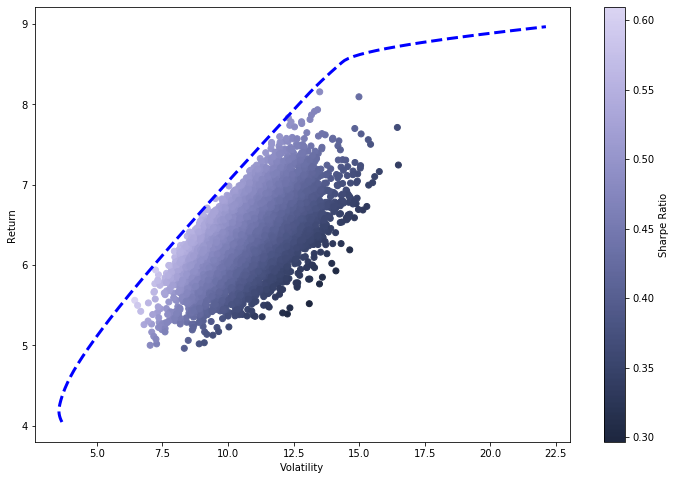

In [7]:
current_frontier.plot_frontier(add_random=True)

## Constructing Efficient Portfolios

How do we use this to select and evaluate portfolios? We can assume that our hypothetical investor would prefer to be compensated for investment risk and use minimum volatility portfolios where possible. In evaluating portfolio selections for retail investors, many firms use risk tolerances to determine investment allocations. This analysis adopts that approach by segregating the upper section of the frontier "parabola" and selecting five portfolios based on volatility. The five portfolios are selected based on quantiles of volatility as outlined below:

| Risk Tolerance Level    | Abbreviation | Quantile                |
|:------------------------|:-------------|:------------------------|
| Conservative            | cons         | 0% (Minimum Volatility) |
| Moderately Conservative | mod_cons     | 25%                     |
| Moderate                | mod          | 50%                     |
| Moderately Aggressive   | mod_agg      | 75%                     |
| Aggressive              | agg          | 90%                     |

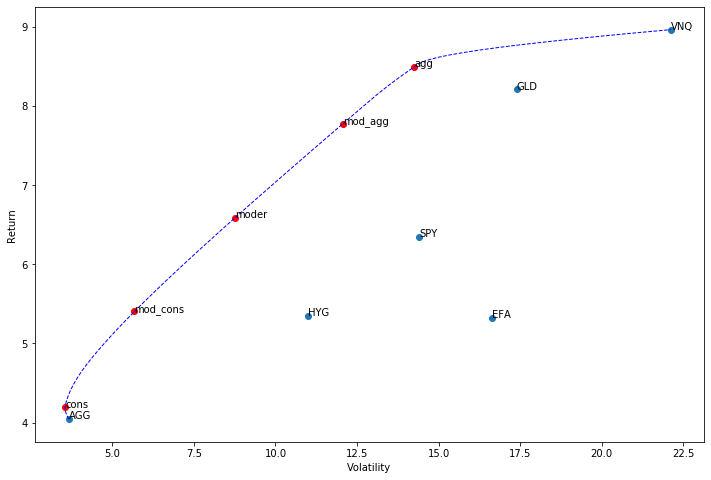

In [8]:
risk_levels = ['cons', 'mod_cons', 'moder', 'mod_agg', 'agg']
five_ports = current_frontier.generate_five_levels().reset_index(drop=True)

fig, ax = plt.subplots(figsize=(12, 8))
ax = plt.scatter(x=five_ports['volatility'], y=five_ports['return'], color='r')
for i, txt in enumerate(risk_levels):
    plt.annotate(txt, (five_ports['volatility'][i], five_ports['return'][i]))

ax = plt.plot(current_frontier.frontier['volatility'],
              current_frontier.frontier['return'], 'b--', linewidth=1)

ax = plt.scatter(x=etf_returns.std()*np.sqrt(12), y=etf_exp_returns)
for i, txt in enumerate(etf_returns.columns):
    plt.annotate(txt, ((etf_returns.std()*np.sqrt(12)
                        ).iloc[i], etf_exp_returns.iloc[i]))

plt.ylabel('Return')
plt.xlabel('Volatility')

plt.show()

A portfolio is said to "dominate" another if it provides a higher compensation for risk. In visual terms, a portfolio dominates another if it is above and to the right on the frontier plot. The five portfolios dominate most of the individual ETFs.

## Efficient Portfolio Performance in 2019

What if our hypothetical investor had used this analysis to construct her portfolio? Investing at the beginning of 2019 with the above allocations above would result in the following allocations:

In [9]:
pre_2019 = etf_returns[etf_returns.index.year < 2019]
exp_2019 = pre_2019.agg(calc_si_ann_return)
frontier_2019 = EffFrontier(etf_returns, etf_exp_returns, risk_free)
port_weights =  pd.DataFrame(np.round(frontier_2019.generate_five_levels()['weights'].to_list(
        ), 6), index=risk_levels, columns=pre_2019.columns)
perc_weights = port_weights.multiply(100).round(2)
perc_weights

security,SPY,AGG,EFA,VNQ,GLD,HYG
cons,6.45,93.55,0.0,0.00,0.00,0.0
mod_cons,15.54,61.38,0.0,5.46,17.62,0.0
moder,16.84,34.18,0.0,15.78,33.20,0.0
mod_agg,18.14,6.97,0.0,26.10,48.79,0.0
agg,1.42,0.00,0.0,41.35,57.23,0.0


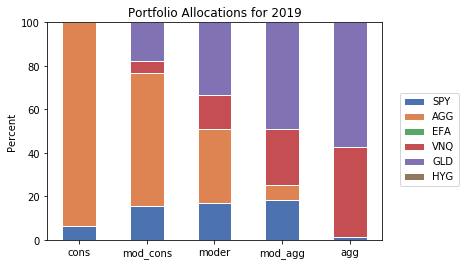

In [10]:
colors = sns.color_palette('deep')

for i, etf in enumerate(port_weights.columns):
    ax = plt.bar(risk_levels, perc_weights[etf], bottom=perc_weights.iloc[:, :i].sum(
        axis=1), width=.5, edgecolor='white', color=colors[i])
plt.ylabel('Percent')
plt.legend(perc_weights.columns, bbox_to_anchor=(1.04,.7))
plt.title('Portfolio Allocations for 2019')
plt.savefig('Images\eff_port_weight_graph_2019.png', bbox_inches='tight')
plt.show()

We see an increasing allocation to gold and real estate as risk tolerance increases. GLD, which performed well as a counter-cyclical asset during the great recession, is given higher weight due to the higher return assumptions. A conservative allocation, predictably, is almost all fixed income. No other instrument in the analysis matches the low volatility of AGG. EFA is dominated by other securities, so its absence in the five portfolios is expected given the return assumptions. 

These allocations provide result in the following portfolio performance for 2019:

In [11]:
etf_2019_returns = etf_returns[etf_returns.index.year == 2019]
port_monthly = {}

for level in risk_levels:
    monthly_returns = annual_rebal_monthly(
        etf_2019_returns, port_weights.loc[level])
    port_monthly[level] = monthly_returns

monthly_returns_2019 = pd.DataFrame(data=port_monthly)
monthly_returns_2019

,cons,mod_cons,moder,mod_agg,agg
date,,,,,
2019-01-31,1.368353,2.959174,4.488683,6.018638,6.667722
2019-02-28,0.117412,0.394424,0.445264,0.494728,0.011852
2019-03-31,2.100547,1.545945,1.216361,0.896919,0.988538
2019-04-30,0.103313,0.444654,0.432353,0.420400,-0.366259
2019-05-31,1.302306,0.334304,0.010068,-0.306734,0.899240
2019-06-30,1.495969,3.247133,4.384265,5.501653,5.093330
2019-07-31,0.276725,0.465442,0.619707,0.768190,0.764458
2019-08-31,2.458791,2.986774,3.812069,4.603274,5.949388
2019-09-30,-0.434024,-0.556229,-0.682790,-0.801988,-1.043290


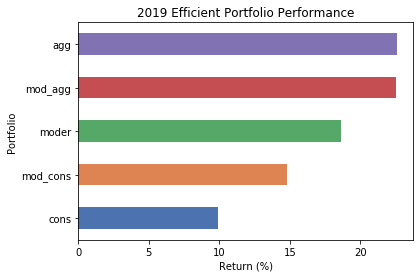

In [12]:
monthly_returns_2019.agg(cum_return_per).plot.barh(title='2019 Efficient Portfolio Performance', color=colors)
plt.ylabel('Portfolio')
plt.xlabel('Return (%)')
plt.savefig('Images\eff_port_returns_2019.png')
plt.show()

An aggressive allocation consisting mostly of VNQ and GLD would have provided the highest returns of the five options. However, many retail investors look at the S&P 500 as a performance benchmark. Considering that firms such as Fidelity and Charles Schwab have introduced US equity ETFs at no cost, retail investors have access to free beta. In more rigorous performance analysis, more appropriate benchmarks would be used, but here we consider a retail investor looking longingly at SPY, which returned 31.22% in 2019.

In [13]:
stats = {}

for port in risk_levels:
    port_dict = {}
    port_stats = PortStats(monthly_returns_2019[port],etf_2019_returns['SPY'],risk_free)
    port_dict['Return'] = port_stats.calc_ann_return()
    port_dict['Sharpe Ratio'] = port_stats.calc_sharpe()
    port_dict['Ann Volatility'] = port_stats.calc_vol()
    port_dict['Beta vs SPY'] = port_stats.calc_beta()
    port_dict['Sortino Ratio (MAR=Risk Free)'] = port_stats.calc_sortino()
    port_dict['Ann Alpha vs SPY'] = port_stats.calc_alpha()
    port_dict['Up Capture vs SPY'] = port_stats.calc_up_cap()
    port_dict['Down Capture vs SPY'] = port_stats.calc_down_cap()
    stats[port] = port_dict

SPY_stats = PortStats(etf_2019_returns['SPY'],etf_2019_returns['SPY'],risk_free)
SPY_dict = {}
SPY_dict['Return'] = SPY_stats.calc_ann_return()
SPY_dict['Sharpe Ratio'] = SPY_stats.calc_sharpe()
SPY_dict['Ann Volatility'] = SPY_stats.calc_vol()
SPY_dict['Beta vs SPY'] = SPY_stats.calc_beta()
SPY_dict['Sortino Ratio (MAR=Risk Free)'] = SPY_stats.calc_sortino()
SPY_dict['Ann Alpha vs SPY'] = SPY_stats.calc_alpha()
SPY_dict['Up Capture vs SPY'] = SPY_stats.calc_up_cap()
SPY_dict['Down Capture vs SPY'] = SPY_stats.calc_down_cap()
stats['SPY'] = SPY_dict
    
port_stat_df = pd.DataFrame(data=stats).round(2)
port_stat_df

,cons,mod_cons,moder,mod_agg,agg,SPY
Return,9.92,14.76,18.63,22.50,22.60,31.22
Sharpe Ratio,2.47,2.87,2.58,2.41,2.10,2.26
Ann Volatility,3.16,4.41,6.39,8.46,9.75,12.90
Beta vs SPY,-0.05,0.11,0.20,0.28,0.17,1.00
Sortino Ratio (MAR=Risk Free),6.48,6.96,7.05,5.89,4.30,1.74
Ann Alpha vs SPY,8.70,8.89,10.10,11.26,14.41,0.00
Up Capture vs SPY,13.45,25.31,32.73,40.20,33.71,100.00
Down Capture vs SPY,-63.94,-55.51,-64.49,-73.09,-125.83,100.00


As measured by the Sharpe ratio, four of the five portfolios constructed using the efficient frontier provided higher compensation for investment risk, which is the point of the minimum variance analysis. An investor purely chasing returns will not monitor volatility well enough. This is one of Markowitz's key contributions to asset allocation analysis. Sure, our efficient portfolios underperformed the market, but a *risk-adjusted* basis reveals more nuance.

The other statistics provided above detail other nuances of performance analysis. The Sortino ratio, which measures compensation for downside deviation, shows that the efficient portfolios also provided greater excess return over the risk-free rate relative to periods of negative performance. 

The aggressive portfolio, which provided impressive alpha over SPY, suffered because of significant underperformance resulting in a very poor down capture for the year. Again, SPY would not be the most appropriate benchmark for a portfolio of gold and real estate, but when retail investors hear quotes of the S&P 500 Index's performance multiple times a day, these measurements can matter.

# Backtesting the Efficient Frontier

As a model of portfolio allocation optimization, the minimum variance approach allows for backtesting the returns over time.

Taking the same hypothetical investor, we assume that she rebalances a portfolio of ETFs annually using the frontier framework. Each December, she invests based on her risk tolerance in an efficient portfolio. 

## Generate 60/40 Portfolio Data

In [14]:
select_etfs = ['AGG','SPY']
select_weights = [.4,.6]
port_components = etf_returns[select_etfs]
port_components.index = pd.to_datetime(port_components.index)
counts = port_components.index.year.value_counts()
counts = counts[counts==12]
port_components = port_components[port_components.index.year.isin(counts.index.to_list())]

concat_list = []
year_list = port_components.index.year.unique().to_list()

for year in year_list:
    one_year = port_components[port_components.index.year == year]
    monthly = annual_rebal_monthly(one_year,select_weights)
    concat_list.append(monthly)
    
sixty_forty = pd.concat(concat_list)
sixty_forty

date
2001-01-31   -37.341559
2001-02-28    -9.489023
2001-03-31    -5.628987
2001-04-30     7.026671
2001-05-31     0.880713
                ...    
2019-08-31    -0.022995
2019-09-30     0.972382
2019-10-31     1.459708
2019-11-30     2.266801
2019-12-31     1.835330
Length: 228, dtype: float64

In [15]:
first_dates = {col: etf_returns[col].first_valid_index().strftime('%m/%d/%Y') for col in etf_returns.columns}
first_dates

{'SPY': '03/31/2000',
 'AGG': '10/31/2003',
 'EFA': '09/30/2001',
 'VNQ': '10/31/2004',
 'GLD': '12/31/2004',
 'HYG': '05/31/2007'}

## Generate Efficient Portfolio History

In [16]:
def generate_ann_ports(history, years, risk_levels):
    risk_level_data = []
    weights_by_year = []

    for year in years:
        level_monthly = {}
        # Filter history through the current year
        etf_past = history[history.index.year < year]
        # Calculate expected return based on past returns
        etf_exp_returns = etf_past.agg(calc_si_ann_return)
        # Instantiate the EF Class
        current_frontier = EffFrontier(
            etf_past, etf_exp_returns, risk_free)  
        # Generate DataFrame with returns, vols, and weights
        risk_level_df = current_frontier.generate_five_levels()
        # Create new DataFrame with portfolio weights, round weights to 6 to avoid weights that should be 0
        level_weights = pd.DataFrame(np.round(risk_level_df['weights'].to_list(
        ), 6), index=risk_levels, columns=history.columns)
        # Call function that converts component monthly returns to buy-and-hold for year strategy for each risk level
        for level in risk_levels:
            monthly_returns = annual_rebal_monthly(
                history[history.index.year == year], level_weights.loc[level])
            level_monthly[level] = monthly_returns
        # Append return and weight DataFrames to lists. Weights DataFrame uses MultiIndex
        risk_level_data.append(pd.DataFrame(data=level_monthly))
        weights_by_year.append(
            pd.concat([level_weights], keys=[year], names=['year', 'port']))

    port_returns = pd.concat(risk_level_data)
    port_weights = pd.concat(weights_by_year)
    return port_returns, port_weights


In [17]:
years = np.arange(2009, 2020, 1)
risk_levels = ['cons', 'mod_cons', 'moder', 'mod_agg', 'agg']

port_returns, port_weights = generate_ann_ports(etf_returns, years, risk_levels)

## Efficient Portfolio Weights Over Time

With annual rebalancing using efficient portfolio allocations, the five portfolios change weights over time as shown below. AGG composes over 90% of the conservative portfolio each year, and the aggressive portfolio comprises a shifting combination portfolios heavily weighted to GLD. 

SPY sees very little exposure in any portfolio, and EFA sees none. This means that the minimum variance optimization sees little risk-adjusted value in equities for the expected returns and covariances provided.

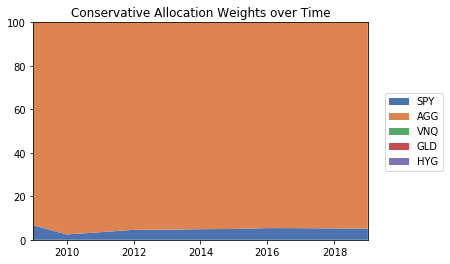

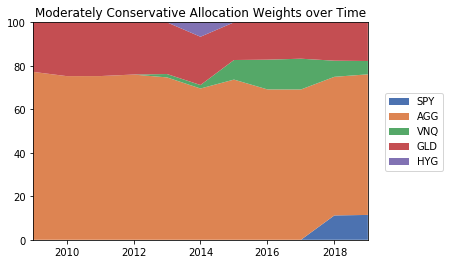

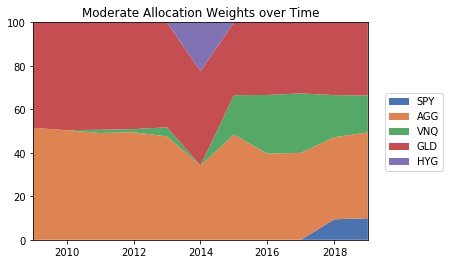

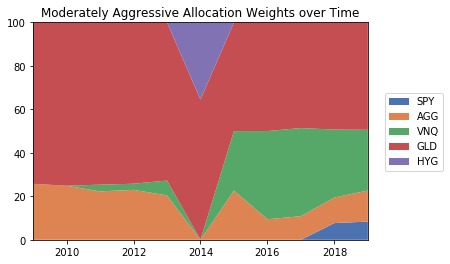

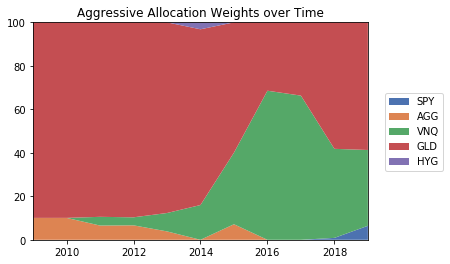

In [18]:
port_name = {
    'cons': 'Conservative',
    'mod_cons': 'Moderately Conservative',
    'moder': 'Moderate',
    'mod_agg': 'Moderately Aggressive',
    'agg': 'Aggressive'
}

for port in risk_levels:
    weights = port_weights.xs(port,level='port')[port_weights.columns[port_weights.max()>0]].multiply(100)
    plt.stackplot(weights.index,weights.T, colors=colors)
    plt.legend(weights.columns, bbox_to_anchor=(1.24,.7))
    plt.margins(0)
    plt.title('{} Allocation Weights over Time'.format(port_name[port]))
    plt.savefig('Images\port_all_{}.png'.format(port), bbox_inches='tight')
    plt.show()

## Evaluating Performance

How would our hypothetical investor do if she decided to eschew the minimum variance analysis and opt for an heuristic? This analysis constructs an annually rebalancing 60% SPY/40% AGG portfolio that uses no optimization whatsoever and makes no consideration for risk tolerance.

The visualizations below show the results. All relative performance measures again use SPY as a benchmark for consistency. The violin plots show rolling statistics measured on a monthly basis for each portfolio. The box plots inside the individual distributions show the quartiles of the rolling values.

Clearly, the 60/40 portfolio outperforms by almost every measure. The annualized return is almost double that of the highest efficient portfolio.

The rolling Sharpe ratios for the 60/40 portfolio exceed those of the efficient portfolio for almost all period. The right skew of the rolling three year Sharpe distribution, provided without any negative value and no left skew, demonstrates superior risk-adjusted performance. On a five year basis, only the conservative portfolio comes close because of the upper half of the distribution.

The highly variable annualized volatility of the more aggressive portfolios bear out the poor Sharpe ratios. The conservative portfolio maintained low volatility throughout the period due to its almost exclusive investment in AGG. 

The below visualizations also show maximum drawdown. The more aggressive portfolios, with higher exposure to GLD and VNQ, were punished by concentrating in counter-cyclical assets in one of the longest equity bull markets in history.

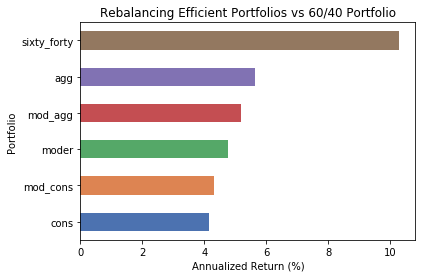

In [19]:
all_ports = pd.concat([port_returns,sixty_forty],axis=1,join='inner').rename(columns={0:'sixty_forty'})
all_ports.agg(calc_si_ann_return).plot.barh(title='Rebalancing Efficient Portfolios vs 60/40 Portfolio', color=colors)
plt.ylabel('Portfolio')
plt.xlabel('Annualized Return (%)')
plt.savefig('Images\port_returns.png', bbox_inches='tight')
plt.show()

In [20]:
def combine_stat_df(port_name, port_returns, benchmark, risk_free, periods, stat):
    stats = PortStats(port_returns, benchmark, risk_free)
    if stat == 'alpha':
        stat_df_list = [stats.rolling_alpha(years=x) for x in periods]
    elif stat == 'return':
        stat_df_list = [stats.rolling_ann_return(years=x) for x in periods]
    elif stat == 'beta':
        stat_df_list = [stats.rolling_beta(years=x) for x in periods]
    elif stat == 'vol':
        stat_df_list = [stats.rolling_vol(years=x) for x in periods]
    elif stat == 'sharpe':
        stat_df_list = [stats.rolling_sharpe(years=x) for x in periods]
    elif stat == 'sortino':
        stat_df_list = [stats.rolling_sortino(years=x) for x in periods]
    elif stat == 'up_cap':
        stat_df_list = [stats.rolling_up_cap(years=x) for x in periods]
    elif stat == 'down_cap':
        stat_df_list = [stats.rolling_down_cap(years=x) for x in periods]
    elif stat == 'max_dd':
        stat_df_list = [stats.rolling_max_dd(years=x) for x in periods]
    df = pd.concat(stat_df_list, axis=1,join='outer')
    df.columns = periods
    df = df.reset_index(drop=False)
    df['port'] = port_name
    return df

In [21]:
periods = [1,3,5]
stats = ['return','alpha','beta','vol','sharpe','sortino','up_cap','down_cap','max_dd']

all_port_stats = {stat:(pd.concat([combine_stat_df(
    port, all_ports[port], etf_history['SPY'], risk_free, periods, stat) for port in all_ports.columns])) for stat in stats}

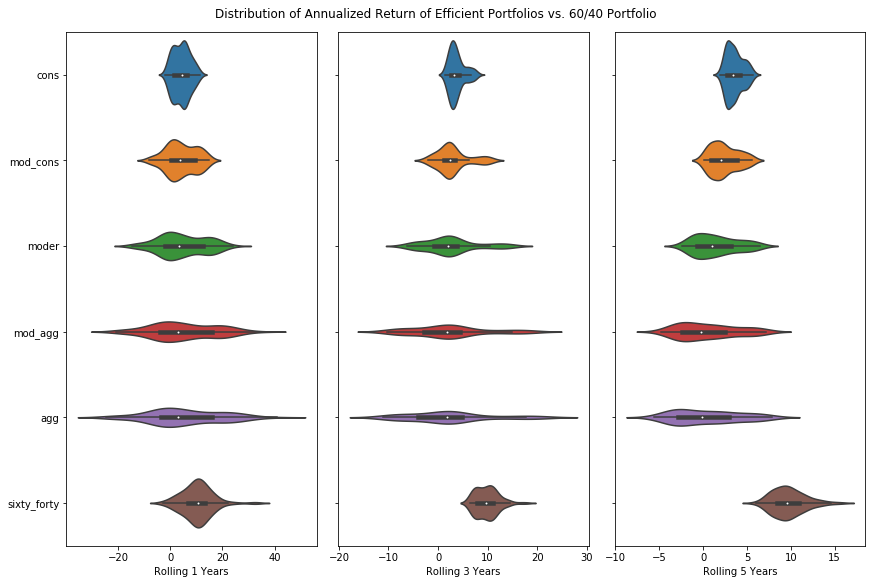

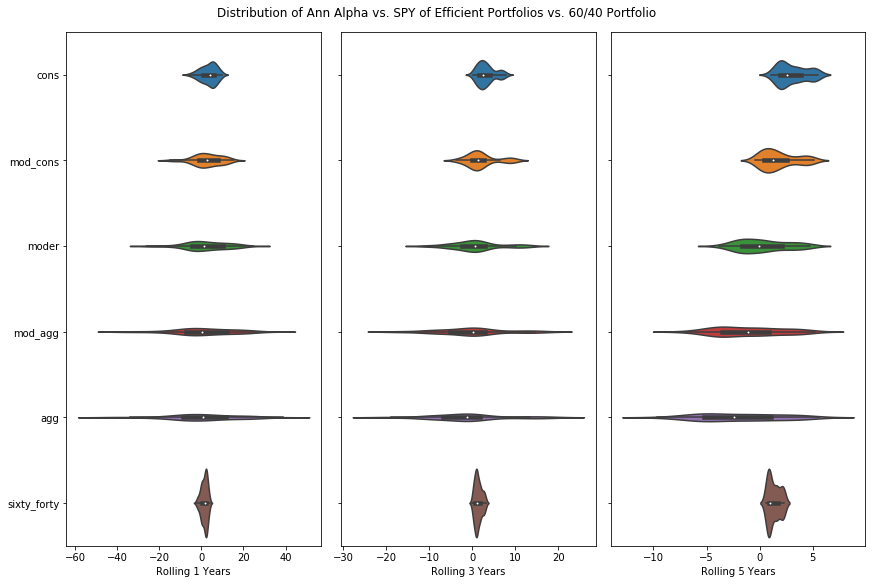

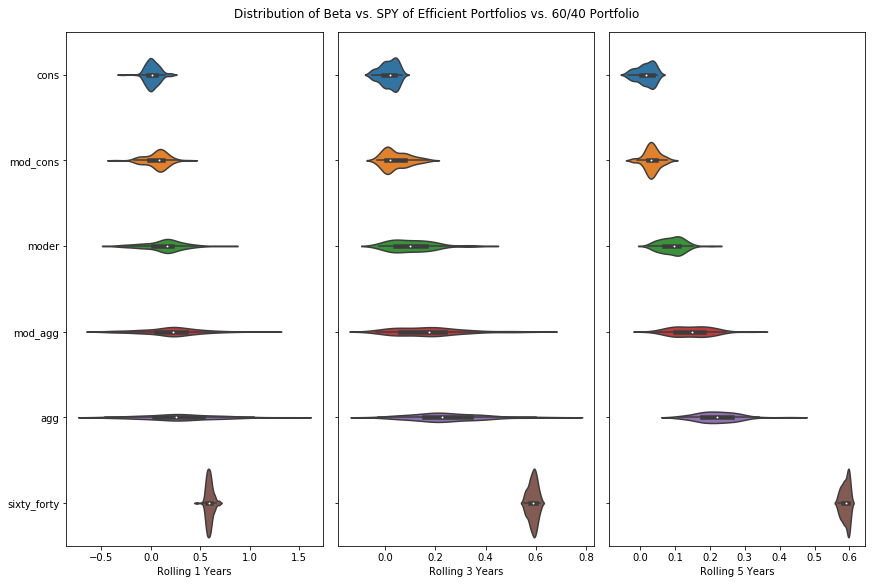

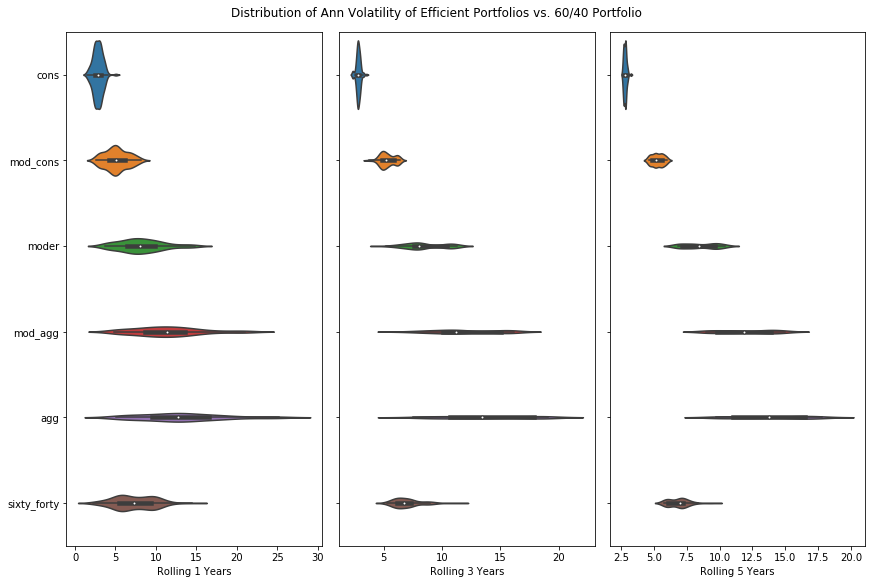

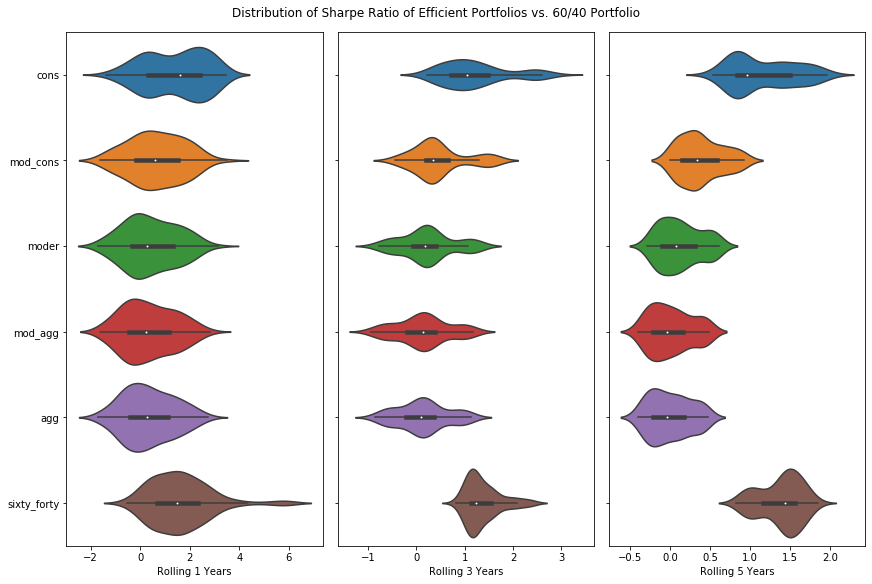

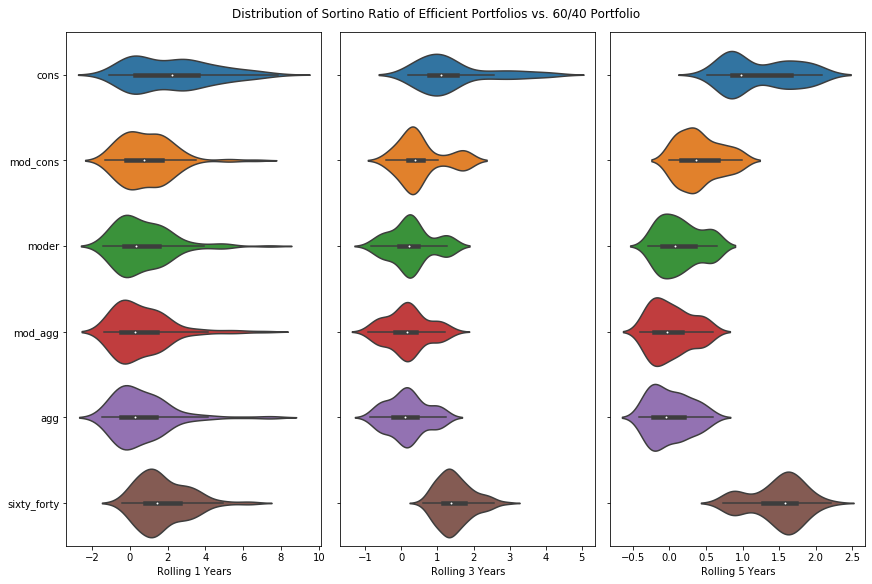

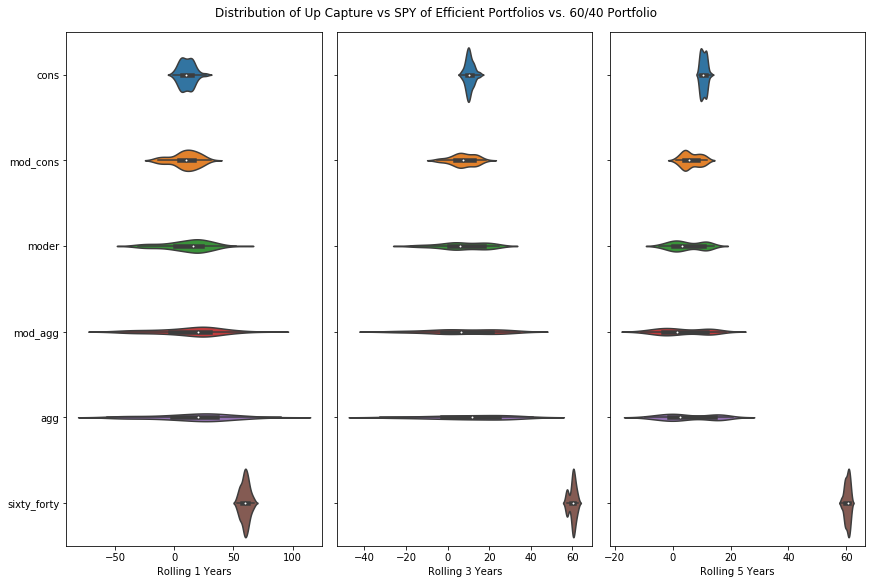

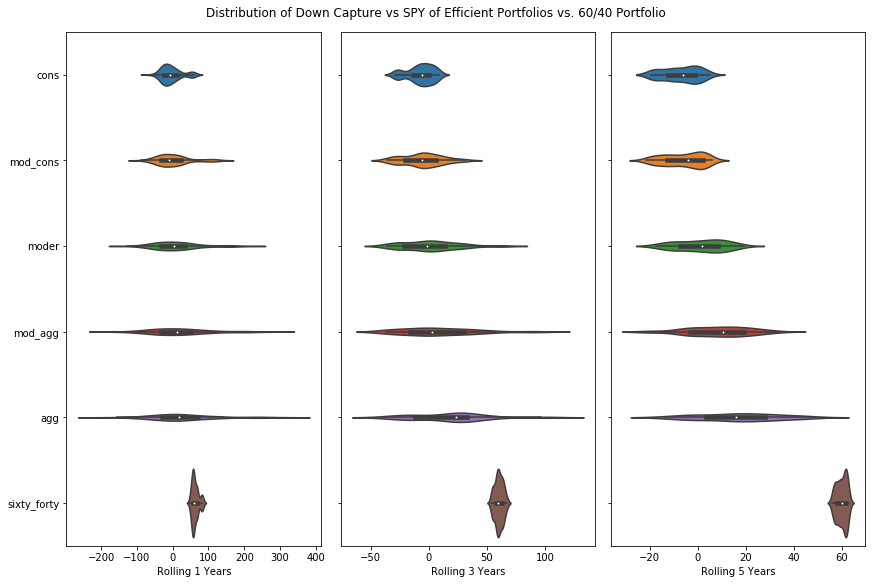

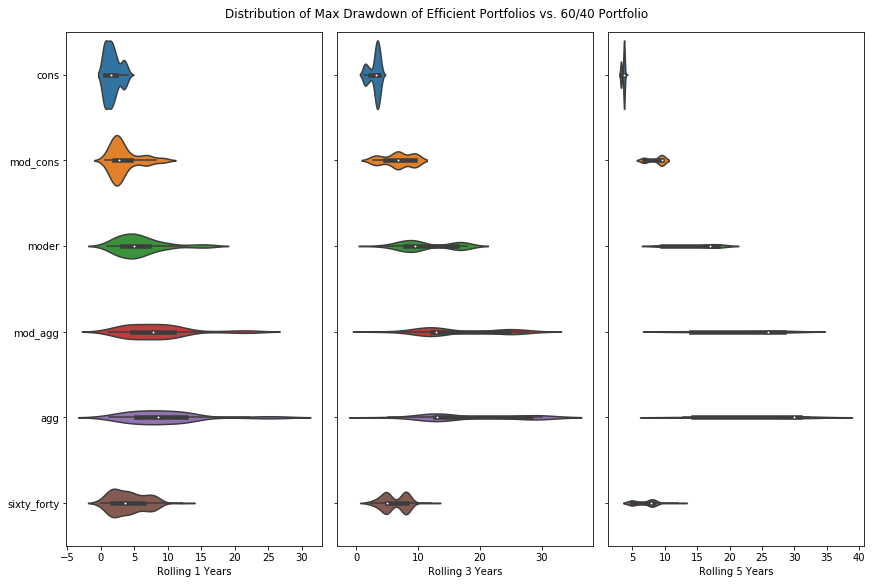

In [22]:
stat_names = {
    'return': 'Annualized Return',
    'alpha': 'Ann Alpha vs. SPY',
    'beta': 'Beta vs. SPY',
    'vol': 'Ann Volatility',
    'sharpe': 'Sharpe Ratio',
    'sortino': 'Sortino Ratio',
    'up_cap': 'Up Capture vs SPY',
    'down_cap': 'Down Capture vs SPY',
    'max_dd': 'Max Drawdown'
}

for stat in stats:
    fig, ax = plt.subplots(1,3, figsize=(12,8), sharey=True, constrained_layout=True)

    for j in range(len(ax)):
        ax[j] = sns.violinplot(data=all_port_stats[stat],x=periods[j],y='port', inner = 'box', ax = ax[j])
        ax[j].set_xlabel('Rolling {} Years'.format(periods[j]))
        ax[j].set_ylabel('')

    fig.suptitle('Distribution of {} of Efficient Portfolios vs. 60/40 Portfolio'.format(stat_names[stat]))
    plt.savefig('Images\port_stat_{}.png'.format(stat), bbox_inches='tight')
    plt.show()


# Discussion and Next Steps

As a theoretical model for discussing the trade-off between risk and return, the minimum variance framework is both elegant and visually compelling. As a model for predicting optimal investment decisions, it leaves much to be desired. The 60/40 heuristic outperformed a backtested model using diversified ETFs on an absolute and a risk-adjusted basis.

This analysis made certain assumptions and structured data in a certain way. Further steps would need to be addressed prior to adopting this framework for practical use. Parameter optimization and research would need to be undertaken for:

* Expected return calculation
* Monthly vs daily returns
* Utilizing different securities to form a portfolio
* Obtaining data to extend investment history

This project is limited to free data available from public sources. With expanded market data access, such as that provided by a Bloomberg terminal or FactSet, one can expand time series with market index data to make covariance and expected return calculations more robust. This analysis is limited by history limits, so most of the statistics are calculated using data over one of the longest equity bull markets in history. Would the minimum variance framework be more compelling over a full market cycle?

This analysis made certain assumptions and structured data in a certain way. Further steps would need to be addressed prior to adopting this framework for practical use. Like other models, the efficient frontier allocations are highly sensitive to inputs. Parameter optimization and research would need to be undertaken for:

The appendix below shows additional simulations of this approach. Because the above analysis resulted in extremely high allocations to GLD, one simulation removes GLD and causes over-allocation to VNQ. The final simulation takes SPY and AGG to look at what allocations the frontier calls efficient. This allows access to more history that extends through the 2008 recession. The resulting portfolios do not outperform on an absolute basis, but four of the five portfolios outperform on a risk-adjusted basis.

# Appendix - Additional Simulations

## Helper Functions

In [64]:
def plot_weights(port_weights, port_names=port_name, colors=sns.color_palette('deep')):
    fig, ax = plt.subplots(1, 5, figsize=(
        12, 5), sharey=True, constrained_layout=True)

    for j in range(len(ax)):
        port = list(port_names.keys())[j]
        weights = port_weights.xs(port, level='port')[
            port_weights.columns[port_weights.max() > 0]].multiply(100)
        ax[j].stackplot(weights.index, weights.T, colors=colors)

        ax[j].margins(0)
        ax[j].set_title('{}'.format(port_name[port]))

    fig.legend(weights.columns, bbox_to_anchor=(1.1, .7))
    plt.show()


def get_stats(history, benchmark, risk_free):
    stats = {}
    for port in history.columns:
        port_dict = {}
        port_stats = PortStats(history[port], benchmark, risk_free)
        port_dict['Return'] = port_stats.calc_ann_return()
        port_dict['Sharpe Ratio'] = port_stats.calc_sharpe()
        port_dict['Ann Volatility'] = port_stats.calc_vol()
        port_dict['Beta vs SPY'] = port_stats.calc_beta()
        port_dict['Sortino Ratio (MAR=Risk Free)'] = port_stats.calc_sortino()
        port_dict['Ann Alpha vs SPY'] = port_stats.calc_alpha()
        port_dict['Up Capture vs SPY'] = port_stats.calc_up_cap()
        port_dict['Down Capture vs SPY'] = port_stats.calc_down_cap()
        stats[port] = port_dict
    return pd.DataFrame(data=stats)

## Without GLD

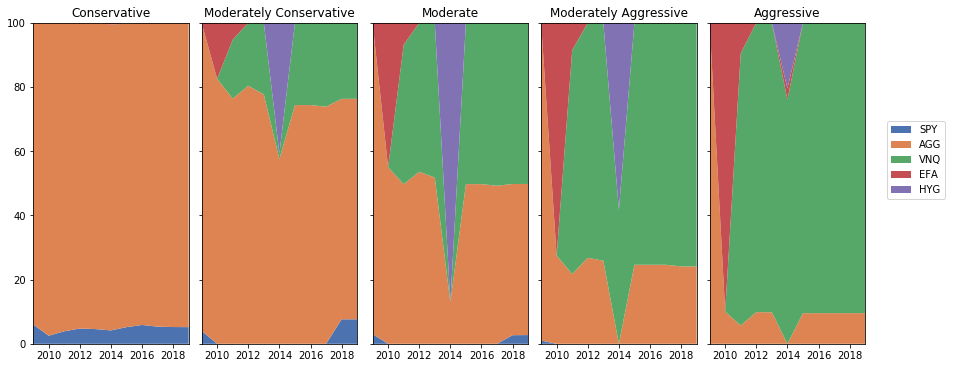

,cons,mod_cons,moder,mod_agg,agg,sixty_forty
Return,4.149002,4.440034,5.102254,6.972958,8.296319,10.301999
Sharpe Ratio,1.193977,0.838889,0.593062,0.569163,0.566555,1.200333
Ann Volatility,3.025843,4.653557,7.699090,11.309134,13.697006,8.135895
Beta vs SPY,0.034508,0.153098,0.315440,0.484129,0.591711,0.593804
Sortino Ratio (MAR=Risk Free),1.217875,0.850956,0.622622,0.600768,0.588894,1.140109
Ann Alpha vs SPY,3.097785,1.774253,0.314543,0.056564,0.076340,1.299804
Up Capture vs SPY,10.717402,17.746646,28.405644,42.925603,52.906582,59.802884
Down Capture vs SPY,-8.398087,8.778866,30.064009,47.794729,58.196205,60.404196


In [61]:
years = np.arange(2009, 2020, 1)
risk_levels = ['cons', 'mod_cons', 'moder', 'mod_agg', 'agg']
select_etfs = ['SPY', 'AGG', 'VNQ', 'EFA', 'HYG']

port_returns, port_weights = generate_ann_ports(
    etf_returns[select_etfs], years, risk_levels)
port_returns = pd.concat([port_returns, sixty_forty],
                         axis=1, join='inner').rename(columns={0: 'sixty_forty'})

plot_weights(port_weights)
get_stats(port_returns, etf_history['SPY'], risk_free)

## Only SPY, AGG, and VNQ

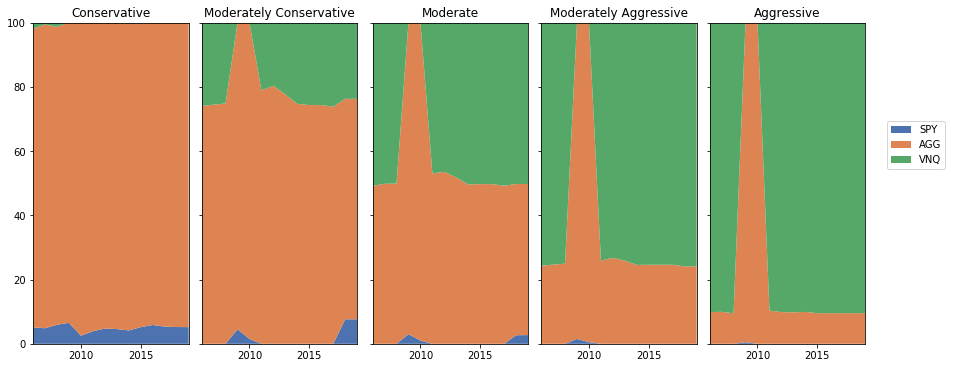

,cons,mod_cons,moder,mod_agg,agg,sixty_forty
Return,4.431243,4.692079,4.899939,4.885478,4.735426,7.629790
Sharpe Ratio,0.896789,0.591560,0.384638,0.267037,0.214675,0.759398
Ann Volatility,3.621831,5.931523,9.662889,13.864187,16.546850,8.489047
Beta vs SPY,0.053762,0.188282,0.353981,0.527203,0.634887,0.591170
Sortino Ratio (MAR=Risk Free),0.970532,0.529745,0.329800,0.228877,0.180528,0.656934
Ann Alpha vs SPY,2.764449,1.960094,1.023300,0.032732,-0.597993,1.434255
Up Capture vs SPY,13.485632,23.278157,35.886610,49.423046,57.956173,61.389636
Down Capture vs SPY,-6.067688,13.344730,36.214979,58.929804,72.432871,60.178579


In [65]:
years = np.arange(2006, 2020, 1)
risk_levels = ['cons', 'mod_cons', 'moder', 'mod_agg', 'agg']
select_etfs = ['SPY','AGG','VNQ']

port_returns, port_weights = generate_ann_ports(etf_returns[select_etfs], years, risk_levels)
port_returns = pd.concat([port_returns,sixty_forty],axis=1,join='inner').rename(columns={0:'sixty_forty'})

plot_weights(port_weights)
get_stats(port_returns,etf_history['SPY'],risk_free)

## SPY and AGG

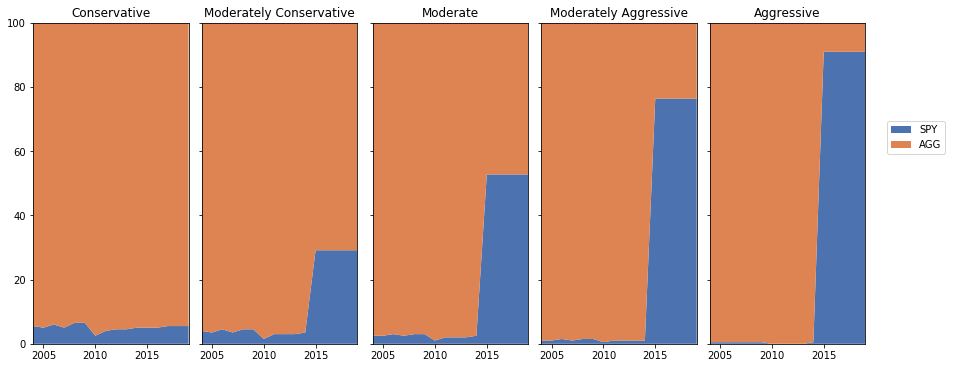

,cons,mod_cons,moder,mod_agg,agg,sixty_forty
Return,4.278052,4.891367,5.489968,6.062262,6.397187,7.405421
Sharpe Ratio,0.825570,0.934332,0.879370,0.788602,0.737563,0.748920
Ann Volatility,3.577853,3.817786,4.737121,6.008069,6.877924,8.119877
Beta vs SPY,0.050901,0.102593,0.155739,0.207528,0.238347,0.591483
Sortino Ratio (MAR=Risk Free),0.847804,0.936580,0.851882,0.734553,0.702035,0.658499
Ann Alpha vs SPY,2.521479,2.691498,2.862609,3.045877,3.163697,1.288600
Up Capture vs SPY,13.693094,19.220615,24.887340,30.461774,33.840857,61.598582
Down Capture vs SPY,-6.037238,1.136883,8.336543,15.166201,19.221413,59.884431


In [62]:
years = np.arange(2004, 2020, 1)
risk_levels = ['cons', 'mod_cons', 'moder', 'mod_agg', 'agg']
select_etfs = ['SPY', 'AGG']

port_returns, port_weights = generate_ann_ports(
    etf_returns[select_etfs], years, risk_levels)
port_returns = pd.concat([port_returns, sixty_forty],
                         axis=1, join='inner').rename(columns={0: 'sixty_forty'})

plot_weights(port_weights)
get_stats(port_returns, etf_history['SPY'], risk_free)